# Cell Complexes

## Setup

In [1]:
import numpy as np

from toponetx import CellComplex as cx

## Cell Complex

In mathematics, a cell complex is a space that is constructed by attaching lower-dimensional cells to a topological space to form a new space. The cells are attatched to the space in a specific way, and the resulting space has a well-defined structure.

For example, a cell complex can be used to represent a simplicial complex, which is a collection of points, line segments, triangles, and higher-dimensional simplices that are connected in a specific way. Each simplex in the simplicial complex is called a cell, and the cell complex consists of all of these cells *and* the way they are connected.

A cell complex is a mathematical structure consisting of a set of points (called vertices or 0-cells), a set of line segments (called edges or 1-cells), and a set of polygons (called faces or 2-cells), such that the vertices, edges, and faces are connected in a consistent way.

The dimension of a cell c ∈ X is denoted by d(c), and the dimension of a cell complex is the largest dimension of one of its cells. $[1]$

## Example of a Cell Complex

Two examples of cell complex can be seen below. 

The left diagram is made up of vertices (0-cells) and edges (1-cells), as the highest dimension object is a 1-cell then this cell complex also had a dimension 1. This diagram has 8 0-cells and 9 1-cells.

The right diagram is made up of vertices (0-cells), edges (1-cells) and faces (2-cells). The highest dimension cell is a 2-cell so the dimension of this cell-complex is 2. This diagram has 9 0-cells, 11 1-cells and 2 2-cells. 


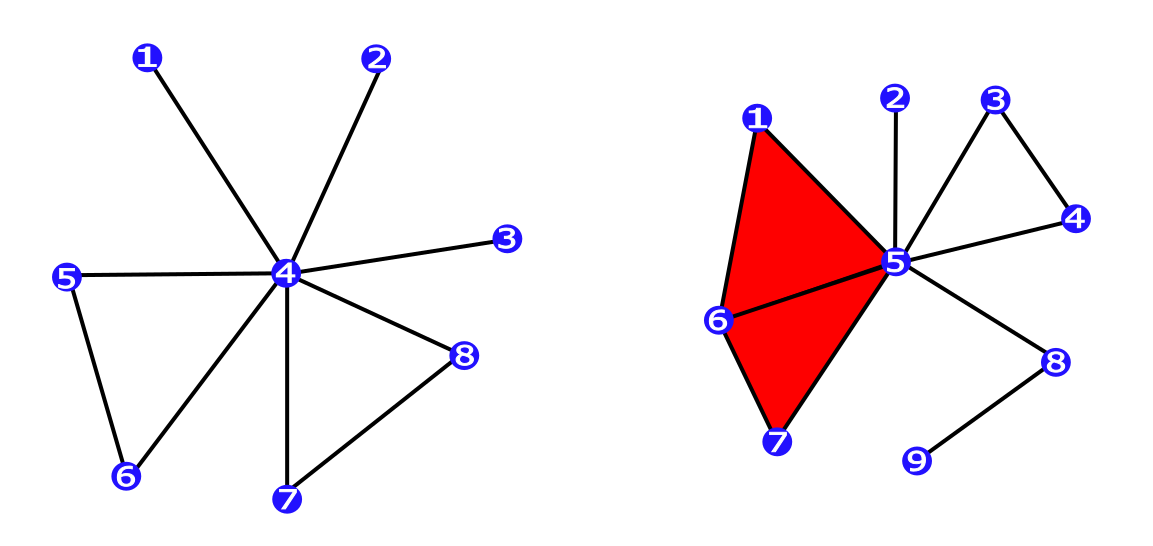

## Example Continued

In [2]:
example_1 = cx()
print(example_1)

example_1.add_cell([1, 4], rank=1)
print(example_1)

example_1.add_cells_from(
    [[2, 4], [3, 4], [4, 5], [5, 6], [4, 6], [4, 7], [7, 8], [4, 8]], rank=1
)
print(example_1)

Cell Complex with 0 nodes, 0 edges  and 0 2-cells 
Cell Complex with 2 nodes, 1 edges  and 0 2-cells 
Cell Complex with 8 nodes, 9 edges  and 0 2-cells 


Using this code creates the cell complex on the left, for now we are calling this example_1. 

The first line is the creation of the cell complex, printing this we can see that it is okay to have empty cell complexes.

Next we want to add the 1-cells and 0-cells, this can be done using the `add_cell` function on line 4 or the `add_cells_from` function on line 7. 

The `add_cell` function is a way of adding individual cells, the rank is where you determine the dimension of the cell you are adding. This can be seen in comparing the first and second lines in the outputs, the cell complex goes from having 0 nodes, edges and 2-cells to having 2 nodes and 1 edge. This is because we have added the edge $[1,4]$ which is made of two nodes 1,4 and one edge that connects them. 

The `add_cells_from` function is a way of adding multiple cells at once. This is done by defining a set of multiple cells with the function, instead of just an individual cell. Again, we need to define the rank of the cells, as this graph is just made up of nodes and edges the rank has always been 1. The addition of multiple cells can be seen in the difference between the second and third lines of the output, where there is an addition of 6 nodes and 8 edges. Comparing the third line of the output with the diagram, we can see that the code used to create example_1 does portray the left diagram above. 

If we had a node without any vertices attatched to it, say the edge between 1 and 4 did not exist, we could add this node with 

`example_1.add_cell([1], rank = 0)` 

as the dimension of a node is 0. 

In [3]:
example_2 = cx()
print(example_2)

example_2.add_cell([1, 5, 6], rank=2)
print(example_2)

example_2.add_cells_from([[5, 6, 7]], rank=2)
print(example_2)

example_2.add_cells_from([[2, 5], [3, 4], [3, 5], [4, 5], [5, 8], [8, 9]], rank=1)
print(example_2)

Cell Complex with 0 nodes, 0 edges  and 0 2-cells 
Cell Complex with 3 nodes, 3 edges  and 1 2-cells 
Cell Complex with 4 nodes, 5 edges  and 2 2-cells 
Cell Complex with 9 nodes, 11 edges  and 2 2-cells 


For the diagram on the right, the same approach is used. However, this time, we also have 2-cells. 

The first line, again, is creating the cell complex and naming it example_2. 

The fourth line is using the previous `add_cell` function to add the 2-cell $[1,5,6]$. From the diagram we know it is a 2-cell because the face is coloured in red, from the code we know it is a 2-cell because we have set the rank equal to 2. 

In the seventh line, we see that the `add_cells_from` function can be used for 2-cells too, and can be used even if only adding one. In the tenth line we use the same function to add all of the edges, as these are of rank 1. 

Looking at the second line of the input, we can see that the addition of a 2-cell increases not only that but also the nodes and edges, because the 2-cell is made up of nodes and edges too.

# up-Laplacian 

## Definition up-Laplacian

*Degree 0:*

A matrix of $k \times k$ dimensions such that $k$ is the number of 0-cells in the cell complex.

For i $\neq$ j,

(i$_{up}$, j$_{up}$) = 0 if the i$^{th}$ 0-cell is not incident to j$^{th}$ 0-cell via a 1-cell incident to i$^{th}$ 0-cell, $\neq$ 0 if it is incident.

For i = j,

(i$_{up}$, j$_{up}$) = n $\in \mathbb{N}$ if the i$^{th}$ 0-cell is incident to n 1-cells. 

*Degree 1:*

A matrix of $k \times k$ dimensions such that $k$ is the number of 1-cells in the cell complex.

For i $\neq$ j,

(i$_{up}$, j$_{up}$) = 0 if the i$^{th}$ 1-cell is not incident to j$^{th}$ 1-cell via a 2-cell incident to i$^{th}$ 1-cell, $\neq$ 0 if it is incident.

For i = j, 

(i$_{up}$, j$_{up}$) = n $\in \mathbb{N}$ if the i$^{th}$ 1-cell is incident to n 2-cells. 

## Example of up-Laplacian

To look at the application of different functions, we will be using example_2 from above (the right diagram). 

In [5]:
row, column, B2 = example_2.incidence_matrix(2, index=True)

print("edges:")
print(row)
print("2-cells:")
print(column)

edges:
{(1, 5): 0, (1, 6): 1, (2, 5): 2, (3, 4): 3, (3, 5): 4, (4, 5): 5, (5, 6): 6, (5, 7): 7, (5, 8): 8, (6, 7): 9, (8, 9): 10}
2-cells:
{(5, 6, 7): 1}


Using the incidence matrix function, we can print the list of edges and 2-cells. This gives us the order that they appear in the up-Laplacian and down-Laplacian too. 

In [6]:
example_2_up = example_2.up_laplacian_matrix(1).todense()

print(example_2_up)

[[ 1. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.  0.  2. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


# Hodge Laplacian

## Defintion of Hodge Laplacian

Set_edge_attributes

Get_edge_attributes

incidence matrix

hodge_laplacian_matrix

up_laplacian_matrix

down_laplacian_matrix


## References

$[1]$ : Hajij, M., Istvan, K. and Zamzmi, G. (n.d.). CELL COMPLEX NEURAL NETWORKS. [online] Available at: https://arxiv.org/pdf/2010.00743.pdf [Accessed 10 Feb. 2023].